In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
print("Lets see the Dataset Values.........\n")
try:
    df = pd.read_csv("Data Sheet/laptops.csv")
    
except FileNotFoundError:
    print("File mot found")
except Exception as e:
    print(f"Error found : {e}")   


Lets see the Dataset Values.........



In [3]:
print("Lets see some data of this data sheet..........\n")
df.head()

Lets see some data of this data sheet..........



,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
print("Lets See the Shape of the Datasets............\n")
print(f"The Total Columns of the Data set is {df.shape[1]} and the total rows of the Dataset is {df.shape[0]}.\n")

Lets See the Shape of the Datasets............

The Total Columns of the Data set is 12 and the total rows of the Dataset is 2160.



In [5]:
print("Let see there is any Null Values or not..........\n")
df.isnull().sum()

Let see there is any Null Values or not..........



Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [6]:
print("Lets see the Data Types of the Dataset Columns.")
df.dtypes

Lets see the Data Types of the Dataset Columns.


Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [7]:
print("Lets Descibe all the Dataset Values....................\n")
df.describe(include='all')

Lets Descibe all the Dataset Values....................



,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


In [8]:
print("Lets remove the null values of this datasets........")

df['Storage type'] = df['Storage type'].fillna(df['Storage type'].mode()[0])
df['GPU'] = df['GPU'].fillna(df['GPU'].mode()[0])
df['Screen'] = df['Screen'].fillna(df['Screen'].mean)
print("Null Value Removed Succesfully..........")

Lets remove the null values of this datasets........
Null Value Removed Succesfully..........


In [9]:
print("Lets check still there is any null values is present or not...............\n ")

df.isnull().sum()

Lets check still there is any null values is present or not...............
 


Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

Lets Check there is any outliers or not............



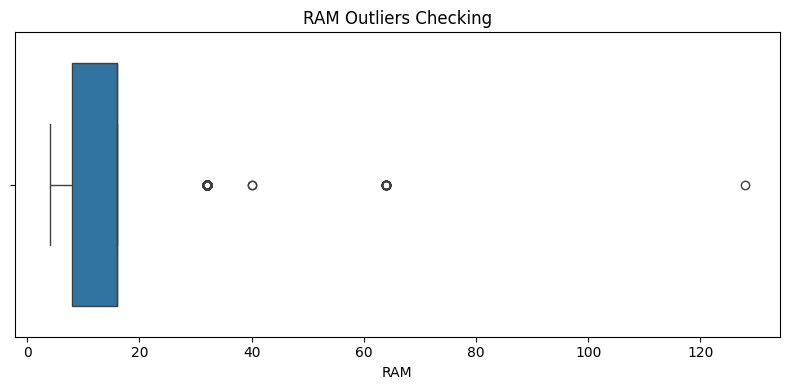

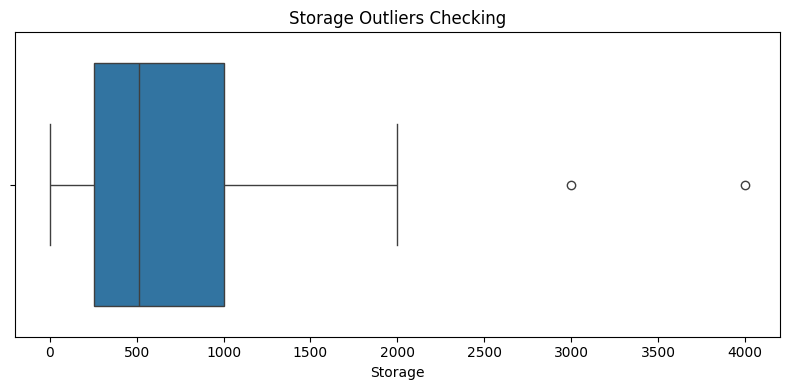

TypeError: Invalid object type at position 624

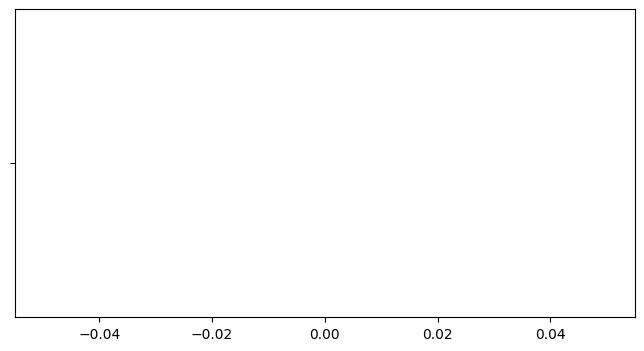

In [10]:
print("Lets Check there is any outliers or not............\n")

temp = ['RAM','Storage','Screen']

for i in temp:
    plt.figure(figsize=(8,4))
    sns.boxplot(x = df[i])
    plt.title(f"{i} Outliers Checking")
    plt.tight_layout()
    plt.show()
print("There is no any OutLiers is present.........\n")

In [11]:
print("Lets Arrange the Columns of the Datasets..............\n")
df.drop('Laptop',axis=1,inplace=True)
print("Removed Laptop Column from this datasets.....................\n")

Lets Arrange the Columns of the Datasets..............

Removed Laptop Column from this datasets.....................



In [12]:
df.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 3050,15.6,No,1009.00
1,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 3050,15.6,No,299.00
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 3050,15.6,No,789.00
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,New,HP,15S,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,669.01


In [13]:
#Lets Rearrange the Columns Name
print("Lets Rearange the Columns..............\n")
rearrange_columns = ['Brand','Model','CPU','Status','RAM','Storage','Storage type','GPU','Screen','Touch','Final Price']
df = df.reindex(columns=rearrange_columns)
df.head()

Lets Rearange the Columns..............



,Brand,Model,CPU,Status,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Asus,ExpertBook,Intel Core i5,New,8,512,SSD,RTX 3050,15.6,No,1009.00
1,Alurin,Go,Intel Celeron,New,8,256,SSD,RTX 3050,15.6,No,299.00
2,Asus,ExpertBook,Intel Core i3,New,8,256,SSD,RTX 3050,15.6,No,789.00
3,MSI,Katana,Intel Core i7,New,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP,15S,Intel Core i5,New,16,512,SSD,RTX 3050,15.6,No,669.01


In [14]:
branch_unique = df['Brand'].unique()
Model_uniqie=df['Model'].unique()
CPU_unique = df['CPU'].unique()
GPU_unique = df['GPU'].unique()

print(branch_unique)
print(Model_uniqie)
print(CPU_unique)
print(GPU_unique)

['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion' 'Acer' 'Apple' 'Razer'
 'Gigabyte' 'Dell' 'LG' 'Samsung' 'PcCom' 'Microsoft' 'Primux' 'Prixton'
 'Dynabook Toshiba' 'Thomson' 'Denver' 'Deep Gaming' 'Vant' 'Innjoo'
 'Jetwing' 'Millenium' 'Realme' 'Toshiba']
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad' 'VivoBook'
 'Akoya' 'Victus' 'V15' 'Thin' 'ROG' 'IdeaPad' 'Cyborg' 'M515UA' 'TUF'
 'Aspire' 'Pavilion' 'Vector' 'Chromebook' 'Omen' 'ZenBook' 'Creator'
 'MacBook Air' 'ThinkBook' '250' 'Modern' '255' 'MacBook Pro' 'Prestige'
 'Stealth' 'Pulse' 'Blade' 'Legion' 'Raider' 'ProBook' 'F515' 'G5'
 'Vostro' 'Nitro' 'Gram' 'E410' 'Flex Advance' 'Bravo' 'Aero' 'Yoga'
 'Galaxy Book' 'Erazer' 'Summit' 'Ultra' 'Extensa' 'Flex' 'EliteBook'
 'Revolt' 'Latitude' 'Envy' 'Deputy' 'Predator' 'Surface Laptop' '14w'
 'Titan' 'Ioxbook' 'Aorus' 'Swift' 'Surface Go' 'Netbook Pro'
 'Surface Pro' 'Notebook' '470' 'Spectre' 'Alurin' 'Satellite Pro' 'XPS'
 'ConceptD' 'E510' 'Beast' 'TravelMate' 'Portégé' 'T

In [15]:
df.dtypes

Brand            object
Model            object
CPU              object
Status           object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen           object
Touch            object
Final Price     float64
dtype: object

In [16]:
#Lets use the Encodeing Technique for the Labeled Columns.

print("We are Encode the Labeled Dataset using the Label Encoder Functions............\n")

temp1 = ['Brand','Model','CPU','Status','Storage type','GPU','Touch']

for i in temp1:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])

df.head()
print("Encoding is Completed Using the Label Encoder................\n")

We are Encode the Labeled Dataset using the Label Encoder Functions............

Encoding is Completed Using the Label Encoder................



In [17]:
#Define The X And Y Columns for the Training and testing data.
print("Define The X And Y Columns for the Training and testing data..........\n")
x = df.iloc[:,:-1]
y = df['Final Price']

Define The X And Y Columns for the Training and testing data..........



In [18]:
#Train Test Splot
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#Lets Rescal the Dataset
print("Lets Rescale the Datasets using Standard Scaler.......\n")

scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

Lets Rescale the Datasets using Standard Scaler.......



TypeError: float() argument must be a string or a real number, not 'method'

In [68]:
#I am Use the Linear Regression:- 
print("Now We are use the Linear Regression Model for Price Prediction..........\n")

lr = LinearRegression()

lr.fit(x_train_scaled,y_train)
y_predict_lr = lr.predict(x_test_scaled)

#accuracy_score,precision_score,f1_score,recall_score
print("Accuracy of Linear Regression Model:",mean_absolute_error(y_test,y_predict_lr))

Now We are use the Linear Regression Model for Price Prediction..........



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values